# Visualizing

### Carregando os dados

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf

In [4]:
datavis = pd.read_csv("data/trabalho_final3.csv", parse_dates=True)

In [5]:
sentimento = pd.read_csv("data/sentimento.csv", parse_dates=True)

In [6]:
datavis.index = datavis["date"]
datavis.index = pd.to_datetime(datavis.index)
datavis.index.name = "date"
datavis.drop(["date"], inplace = True, axis = 1)

In [7]:
sentimento.index = sentimento["Unnamed: 0"]
sentimento.index = pd.to_datetime(sentimento.index)
sentimento.index.name = "date"
sentimento.drop(["Unnamed: 0", "data", "hora_ajustada","text"], inplace = True, axis = 1)

In [8]:
datavis.head()

dollar  CRISE      r_vol      r_oil  r_PETR4  \
date                                                                
2020-08-07 16:00:00  5.4113   44.0  4924000.0  41.529999     35.0   
2020-08-10 10:00:00  5.3748   51.0        0.0  42.090000      0.0   
2020-08-10 11:00:00  5.4010   62.0  4043200.0  41.880001      2.0   
2020-08-10 12:00:00  5.4239   90.0  3890900.0  42.099998      4.0   
2020-08-10 13:00:00  5.4180   58.0  1918000.0  42.250000     33.0   

                     r_PETROBRAS       ma24      macd  macdsignal  macdhist  \
date                                                                          
2020-08-07 16:00:00         31.0  22.852500  0.228166    0.415357 -0.187191   
2020-08-10 10:00:00          8.0  22.894584  0.207372    0.373760 -0.166388   
2020-08-10 11:00:00         20.0  22.932917  0.187121    0.336432 -0.149311   
2020-08-10 12:00:00          7.0  22.970000  0.161146    0.301375 -0.140229   
2020-08-10 13:00:00         27.0  22.954584  0.146137    0.270327 -0.124190   

                     bbands  rsi_dummy  atr_dummy  target_value  target_class  
date                                                                           
2020-08-07 16:00:00       0          0          0      0.001318           1.0  
2020-08-10 10:00:00       0          0          0     -0.000878           0.0  
2020-08-10 11:00:00       0          0          0     -0.004392           0.0  
2020-08-10 12:00:00       1          0          0      0.003970           1.0  
2020-08-10 13:00:00       0          0          0      0.015817           1.0

In [9]:
sentimento.head()

texto_processado  \
date                                                                     
2022-02-01 10:00:00  dica leitura direto biblioteca pra psicologia ...   
2022-02-01 12:00:00  block trade starboard vende metade posição pon...   
2022-02-01 13:00:00  atualização vale banco pan randon outros desta...   
2022-02-01 14:00:00  ⚠️ ibovespafuturo registra queda entenda veja ...   
2022-02-01 16:00:00  lucro ajustado romi cresce soma milhões financ...   

                     sentimento  
date                             
2022-02-01 10:00:00      0.7964  
2022-02-01 12:00:00      0.0000  
2022-02-01 13:00:00     -0.4767  
2022-02-01 14:00:00      0.2732  
2022-02-01 16:00:00      0.9231

In [10]:
datavis.describe()

dollar        CRISE         r_vol        r_oil      r_PETR4  \
count  2927.000000  2927.000000  2.927000e+03  2927.000000  2927.000000   
mean      5.311110    52.474547  7.718721e+06    70.363809    13.515203   
std       0.270399    15.408649  5.218697e+06    21.681976    11.765408   
min       4.607500     2.000000  0.000000e+00    35.290001     0.000000   
25%       5.131750    45.000000  4.380400e+06    53.210001     3.000000   
50%       5.323400    54.000000  6.748700e+06    68.860001    12.000000   
75%       5.540050    62.000000  1.022300e+07    82.400002    21.000000   
max       5.860900   100.000000  2.850740e+07   128.389999    76.000000   

       r_PETROBRAS         ma24         macd   macdsignal     macdhist  \
count  2927.000000  2927.000000  2927.000000  2927.000000  2927.000000   
mean     20.835269    27.194997     0.018833     0.019316    -0.000483   
std      11.372162     3.860984     0.295400     0.274152     0.099435   
min       0.000000    19.122500    -1.802307    -1.458478    -0.830058   
25%      13.000000    23.797291    -0.151689    -0.131087    -0.051616   
50%      19.000000    27.637083     0.039320     0.033246    -0.000169   
75%      27.000000    29.434792     0.203087     0.192144     0.056347   
max      71.000000    34.682500     0.844836     0.737368     0.366460   

            bbands    rsi_dummy    atr_dummy  target_value  target_class  
count  2927.000000  2927.000000  2927.000000   2927.000000   2927.000000  
mean      0.201572     0.118551     0.156816      0.000170      0.486163  
std       0.401242     0.323315     0.363689      0.011561      0.499894  
min       0.000000     0.000000     0.000000     -0.207478      0.000000  
25%       0.000000     0.000000     0.000000     -0.003642      0.000000  
50%       0.000000     0.000000     0.000000      0.000000      0.000000  
75%       0.000000     0.000000     0.000000      0.003990      1.000000  
max       1.000000     1.000000     1.000000      0.160256      1.000000

## Dados I: Período de 2 anos sem os dados textuais

### Features ao longo do tempo

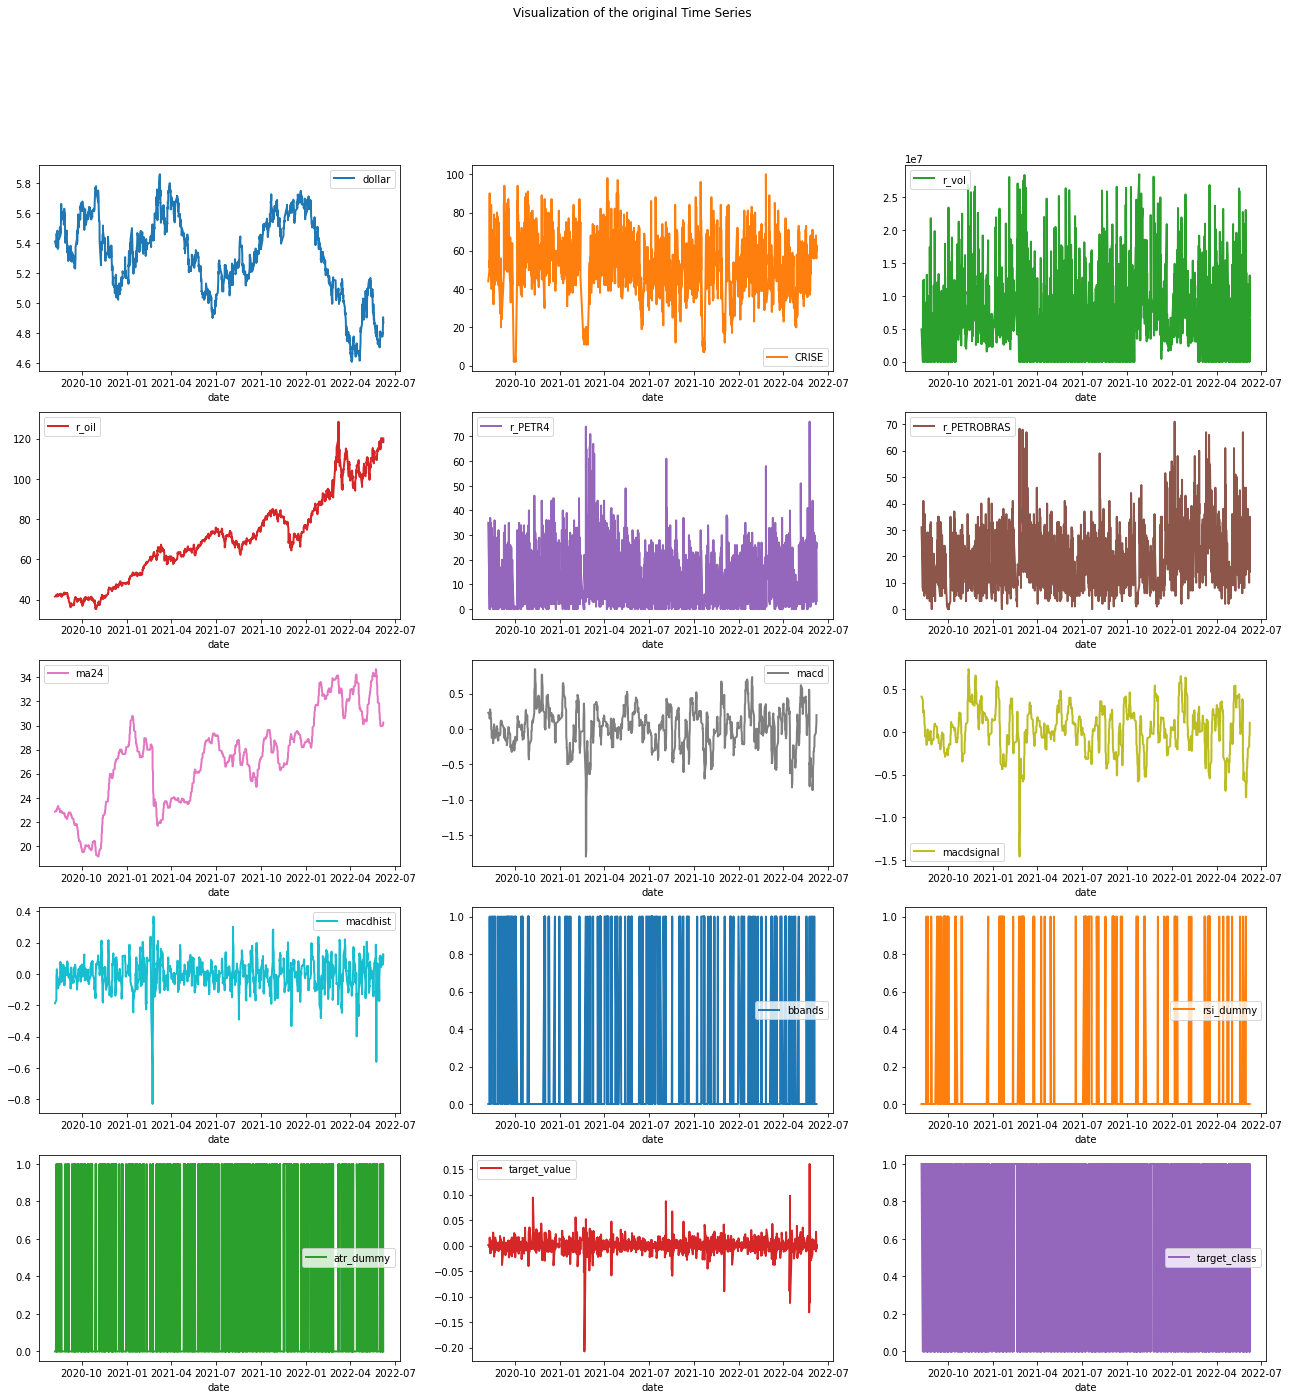

In [10]:
datavis.plot(subplots=True,
        layout=(5, 3),
        figsize=(22,22),
        fontsize=10, 
        linewidth=2,
        sharex=False,
        title='Visualization of the original Time Series')
plt.show()

Podemos ver que as variáveis referentes ao preço do petróleo, do dólar e a média móvel de 24 períodos apresentam tendência. Como visto, é preferível transformá-las em séries estacionárias, calculando sua variação ao longo do tempo:

In [11]:
datavis["dollar"] = datavis["dollar"].pct_change()
datavis["r_oil"] = datavis["r_oil"].pct_change()
datavis["ma24"] = datavis["ma24"].pct_change()

In [12]:
datavis.isna().sum()

dollar          1
CRISE           0
r_vol           0
r_oil           1
r_PETR4         0
r_PETROBRAS     0
ma24            1
macd            0
macdsignal      0
macdhist        0
bbands          0
rsi_dummy       0
atr_dummy       0
target_value    0
target_class    0
dtype: int64

In [13]:
datavis.head()

dollar  CRISE      r_vol     r_oil  r_PETR4  \
date                                                                 
2020-08-07 16:00:00       NaN   44.0  4924000.0       NaN     35.0   
2020-08-10 10:00:00 -0.006745   51.0        0.0  0.013484      0.0   
2020-08-10 11:00:00  0.004875   62.0  4043200.0 -0.004989      2.0   
2020-08-10 12:00:00  0.004240   90.0  3890900.0  0.005253      4.0   
2020-08-10 13:00:00 -0.001088   58.0  1918000.0  0.003563     33.0   

                     r_PETROBRAS      ma24      macd  macdsignal  macdhist  \
date                                                                         
2020-08-07 16:00:00         31.0       NaN  0.228166    0.415357 -0.187191   
2020-08-10 10:00:00          8.0  0.001842  0.207372    0.373760 -0.166388   
2020-08-10 11:00:00         20.0  0.001674  0.187121    0.336432 -0.149311   
2020-08-10 12:00:00          7.0  0.001617  0.161146    0.301375 -0.140229   
2020-08-10 13:00:00         27.0 -0.000671  0.146137    0.270327 -0.124190   

                     bbands  rsi_dummy  atr_dummy  target_value  target_class  
date                                                                           
2020-08-07 16:00:00       0          0          0      0.001318           1.0  
2020-08-10 10:00:00       0          0          0     -0.000878           0.0  
2020-08-10 11:00:00       0          0          0     -0.004392           0.0  
2020-08-10 12:00:00       1          0          0      0.003970           1.0  
2020-08-10 13:00:00       0          0          0      0.015817           1.0

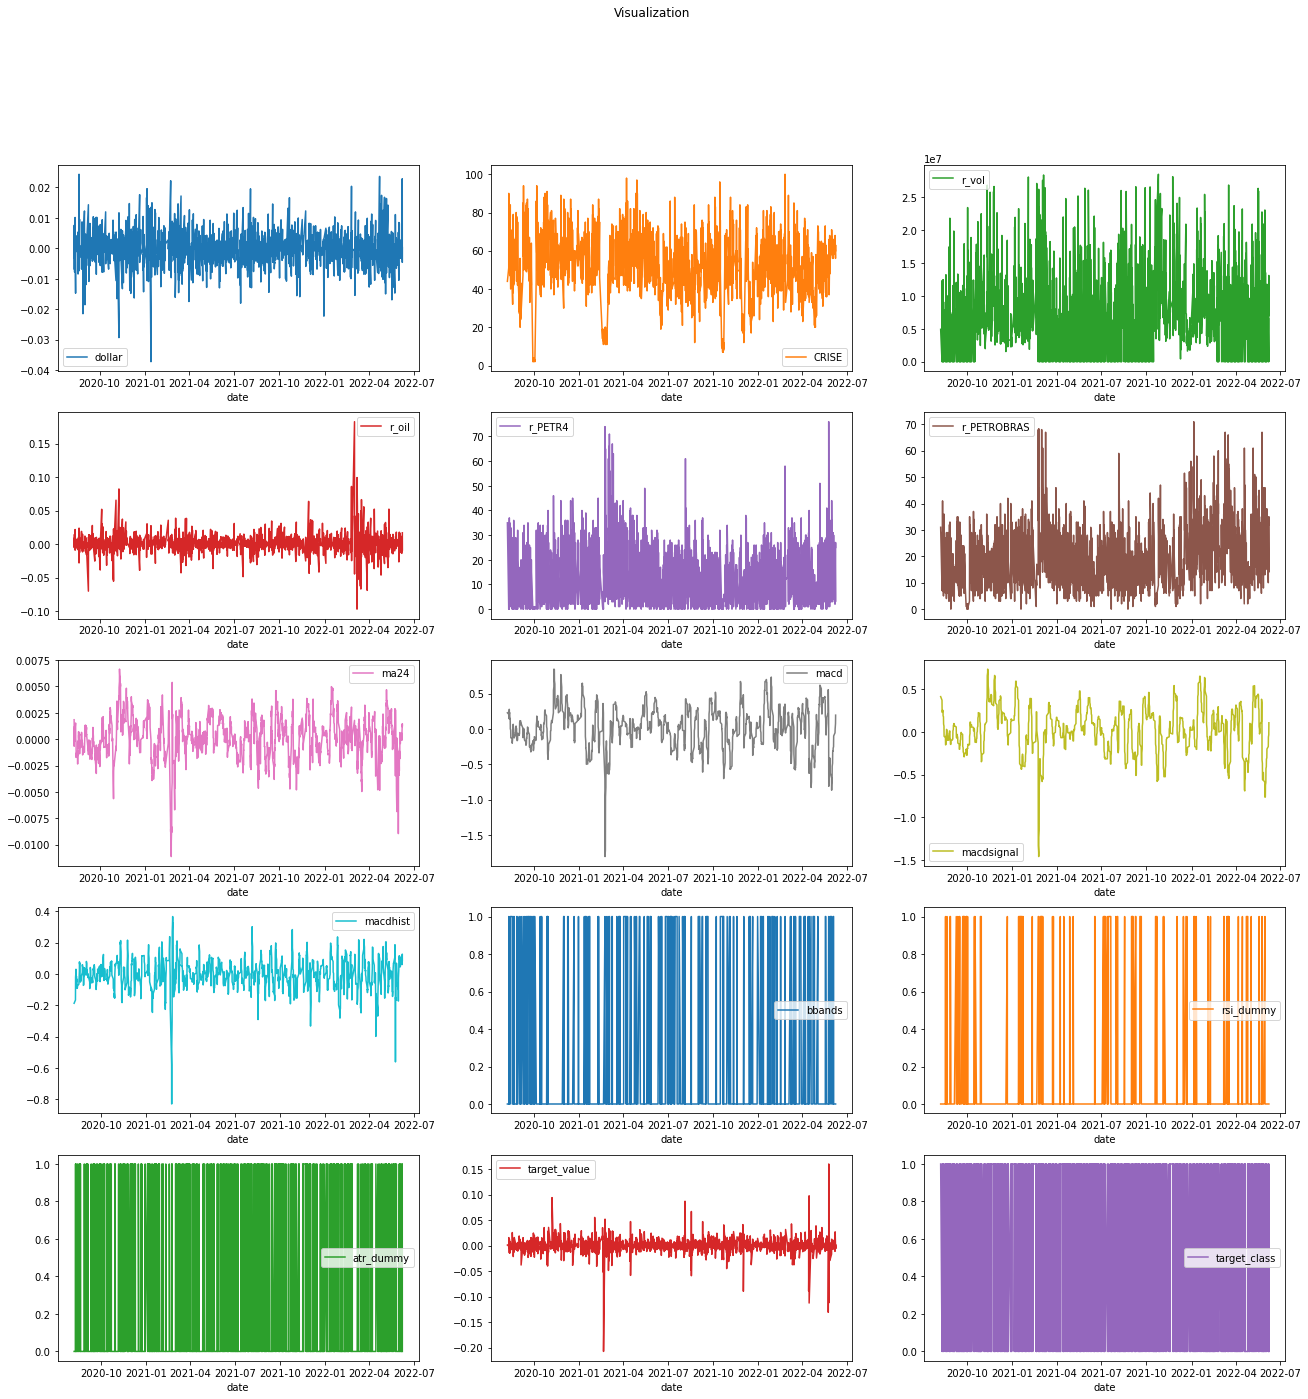

In [14]:
datavis.plot(subplots=True,
        layout=(5, 3),
        figsize=(22,22),
        sharex=False,
        title='Visualization')
plt.show()

In [15]:
datavis = datavis.loc[datavis.index>"2020-08-07 16:00:00"]

In [16]:
datavis.isna().sum()

dollar          0
CRISE           0
r_vol           0
r_oil           0
r_PETR4         0
r_PETROBRAS     0
ma24            0
macd            0
macdsignal      0
macdhist        0
bbands          0
rsi_dummy       0
atr_dummy       0
target_value    0
target_class    0
dtype: int64

### Matriz de Correlações

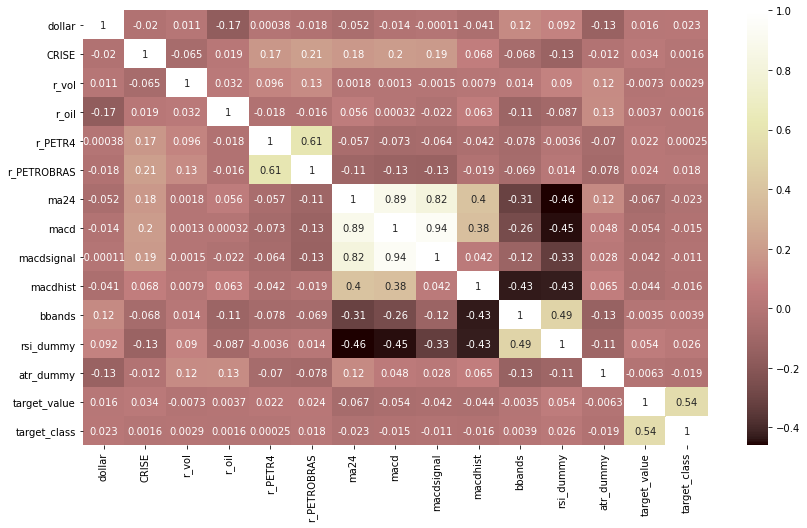

In [17]:
plt.figure(figsize = (14,8))
sns.heatmap(datavis.corr(), annot = True, cmap='pink')
plt.show()

In [18]:
datavis.columns

Index(['dollar', 'CRISE', 'r_vol', 'r_oil', 'r_PETR4', 'r_PETROBRAS', 'ma24',
       'macd', 'macdsignal', 'macdhist', 'bbands', 'rsi_dummy', 'atr_dummy',
       'target_value', 'target_class'],
      dtype='object')

### Relações entre as features contínuas

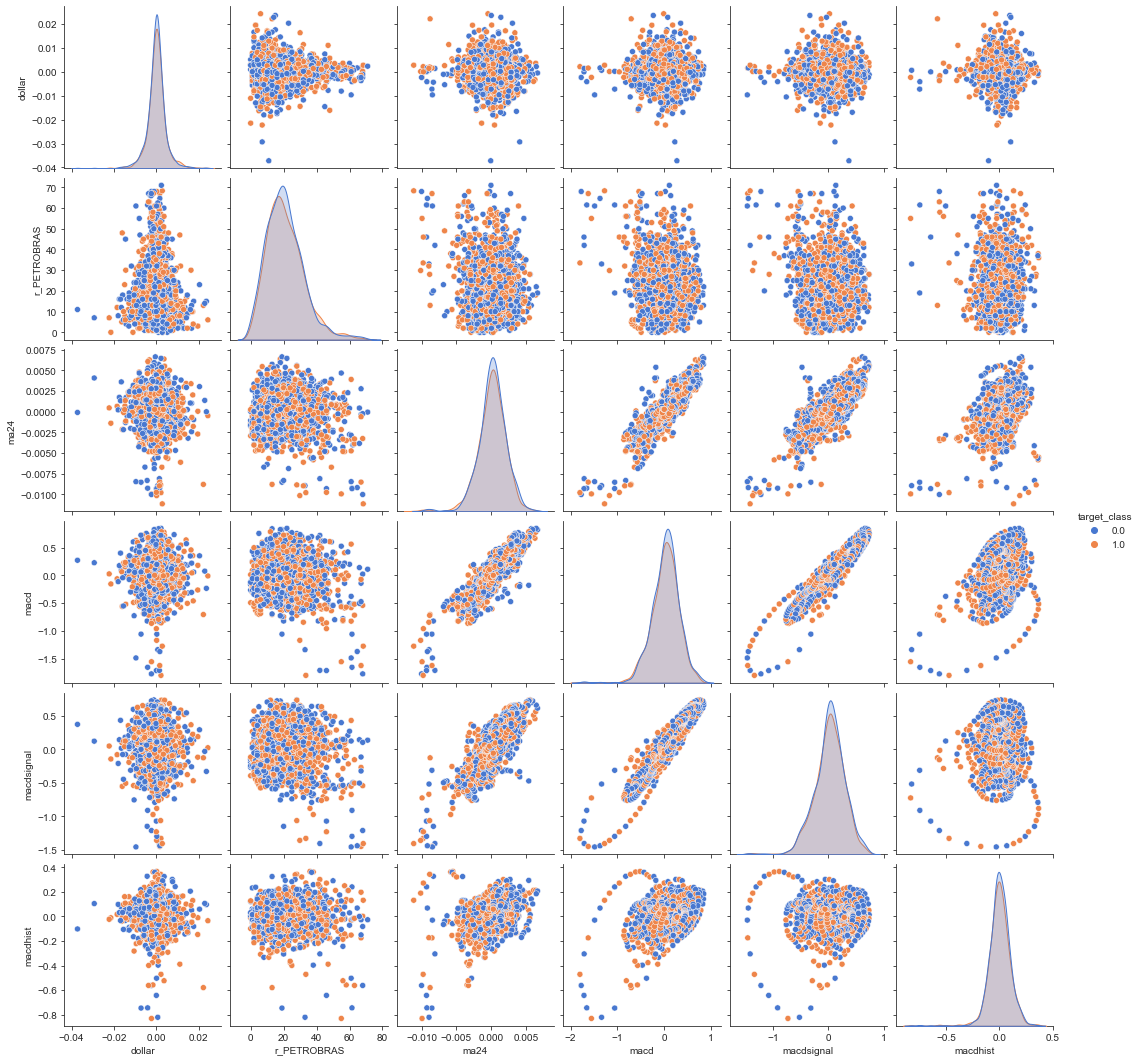

In [20]:
continuas = ['dollar', 'r_PETROBRAS', 'ma24','macd', 'macdsignal', 'macdhist','target_class']

continuas2 = ['dollar', 'r_PETROBRAS', 'ma24','macd', 'macdsignal', 'macdhist']

sns.set_style("ticks")
sns.pairplot(data = datavis[continuas], hue = "target_class", vars = datavis[continuas2].columns, palette="muted")

Conforme visto nas densidades representando a distribuição de cada feature para a classe "acréscimo" (1) e "decréscimo" (0), praticamente não há distinção nessas distribuições, confirmando o baixo poder de predição das features, consistente com o caráter randômico do mercado financeiro. Abaixo, as médias de cada feature por classe também demonstram esse mesmo aspecto.

In [21]:
datavis.groupby('target_class').mean().to_csv("medias.csv")

Como MACD e MACDSIGNAL parecem estar relacionadas linearmente, faremos a eliminação de uma delas, tendo em vista que podem não estar acrescentando informação ao modelo.

In [22]:
datavis.drop(["macdsignal"], inplace = True, axis = 1)

### Visualizando em 3 dimensões

In [23]:
data3d = datavis.copy()
data3d["target_cat"] = data3d["target_class"].astype(str)

In [24]:
data3d["target_cat"]

date
2020-08-10 10:00:00    0.0
2020-08-10 11:00:00    0.0
2020-08-10 12:00:00    1.0
2020-08-10 13:00:00    1.0
2020-08-10 14:00:00    1.0
                      ... 
2022-06-07 11:00:00    0.0
2022-06-07 12:00:00    1.0
2022-06-07 13:00:00    0.0
2022-06-07 14:00:00    1.0
2022-06-07 15:00:00    0.0
Name: target_cat, Length: 2926, dtype: object

In [29]:
fig = px.scatter_3d(data3d, x='r_PETROBRAS', y='ma24', z='dollar',
              color='target_cat',
                   color_discrete_sequence=px.colors.qualitative.D3)
fig.update_layout(scene = dict(
                    xaxis_title='Buscas pelo termo "PETROBRAS"',
                    yaxis_title='Moving Average',
                    zaxis_title='Dólar'),
                    width=700,
                    margin=dict(r=20, b=10, l=10, t=10))
fig.show()

In [37]:
datavis.isna().sum()

dollar          0
CRISE           0
r_vol           0
r_oil           0
r_PETR4         0
r_PETROBRAS     0
ma24            0
macd            0
macdhist        0
bbands          0
rsi_dummy       0
atr_dummy       0
target_value    0
target_class    0
dtype: int64

In [25]:
datavis.to_csv("data/trabalho_final4.csv", date_format = '%Y-%m-%d %H:%M:%S')

## Dados II: Período de 4 meses com dados textuais

In [30]:
data_tweets = pd.merge(datavis, sentimento, how = "left", left_index=True, right_index=True)

In [31]:
data_tweets.tail()

dollar  CRISE       r_vol     r_oil  r_PETR4  \
date                                                                  
2022-06-07 11:00:00 -0.000714   63.0  13122100.0 -0.003507      4.0   
2022-06-07 12:00:00 -0.002877   63.0   7320000.0  0.001005      6.0   
2022-06-07 13:00:00 -0.004604   63.0   6206100.0 -0.001507     22.0   
2022-06-07 14:00:00 -0.000185   63.0   7855400.0 -0.009808     27.0   
2022-06-07 15:00:00  0.000247   60.0   7019300.0  0.016763     25.0   

                     r_PETROBRAS      ma24      macd  macdhist  bbands  \
date                                                                     
2022-06-07 11:00:00         22.0  0.001331  0.125461  0.125592       0   
2022-06-07 12:00:00         27.0  0.001163  0.158129  0.126608       0   
2022-06-07 13:00:00         32.0  0.001425  0.184316  0.122236       0   
2022-06-07 14:00:00         35.0  0.001464  0.188372  0.101034       0   
2022-06-07 15:00:00         32.0  0.001310  0.194988  0.086120       0   

                     rsi_dummy  atr_dummy  target_value  target_class  \
date                                                                    
2022-06-07 11:00:00          0          0     -0.002259           0.0   
2022-06-07 12:00:00          0          0      0.000970           1.0   
2022-06-07 13:00:00          0          0     -0.005816           0.0   
2022-06-07 14:00:00          0          0      0.002275           1.0   
2022-06-07 15:00:00          0          0     -0.004864           0.0   

                                                      texto_processado  \
date                                                                     
2022-06-07 11:00:00  carrefour crfb conclui aquisição grupo big ent...   
2022-06-07 12:00:00  japão otan reforçam laços ante invasão rússia ...   
2022-06-07 13:00:00  aporte furnas usina abre caminho eletrobras el...   
2022-06-07 14:00:00  exposição casa cultura laura alvim reúne artis...   
2022-06-07 15:00:00  senadoras americanas lançam projeto lei cripto...   

                     sentimento  
date                             
2022-06-07 11:00:00      0.4588  
2022-06-07 12:00:00      0.9026  
2022-06-07 13:00:00     -0.9260  
2022-06-07 14:00:00     -0.4215  
2022-06-07 15:00:00      0.2732

In [32]:
data_tweets = data_tweets.dropna()

In [33]:
data_tweets.shape

(567, 16)

In [34]:
data_tweets.drop(["texto_processado"], inplace = True, axis = 1)

In [37]:
data_tweets.columns

Index(['dollar', 'CRISE', 'r_vol', 'r_oil', 'r_PETR4', 'r_PETROBRAS', 'ma24',
       'macd', 'macdhist', 'bbands', 'rsi_dummy', 'atr_dummy', 'target_value',
       'target_class', 'sentimento'],
      dtype='object')

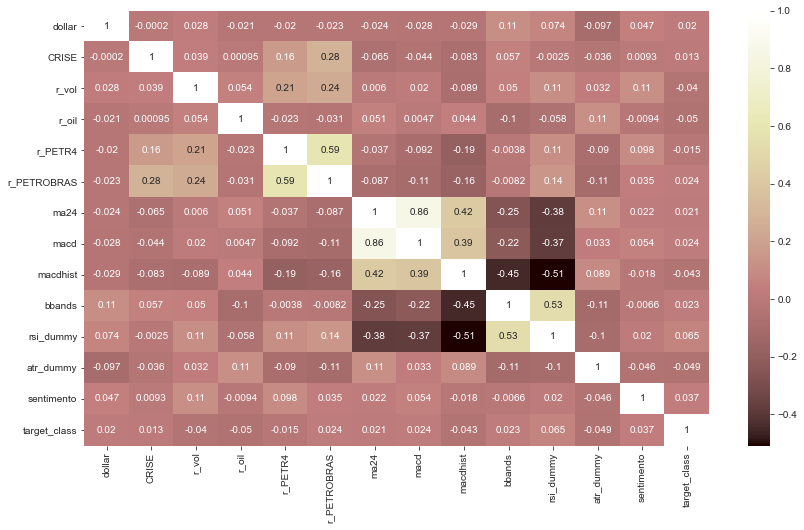

In [38]:
x = ['dollar', 'CRISE', 'r_vol', 'r_oil', 'r_PETR4', 'r_PETROBRAS', 'ma24',
       'macd', 'macdhist', 'bbands', 'rsi_dummy', 'atr_dummy', 'sentimento',
       'target_class']

plt.figure(figsize = (14,8))
sns.heatmap(data_tweets[x].corr(), annot = True, cmap='pink')
plt.show()

C:\Users\bruno\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning:

Dataset has 0 variance; skipping density estimate.

C:\Users\bruno\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning:

Dataset has 0 variance; skipping density estimate.



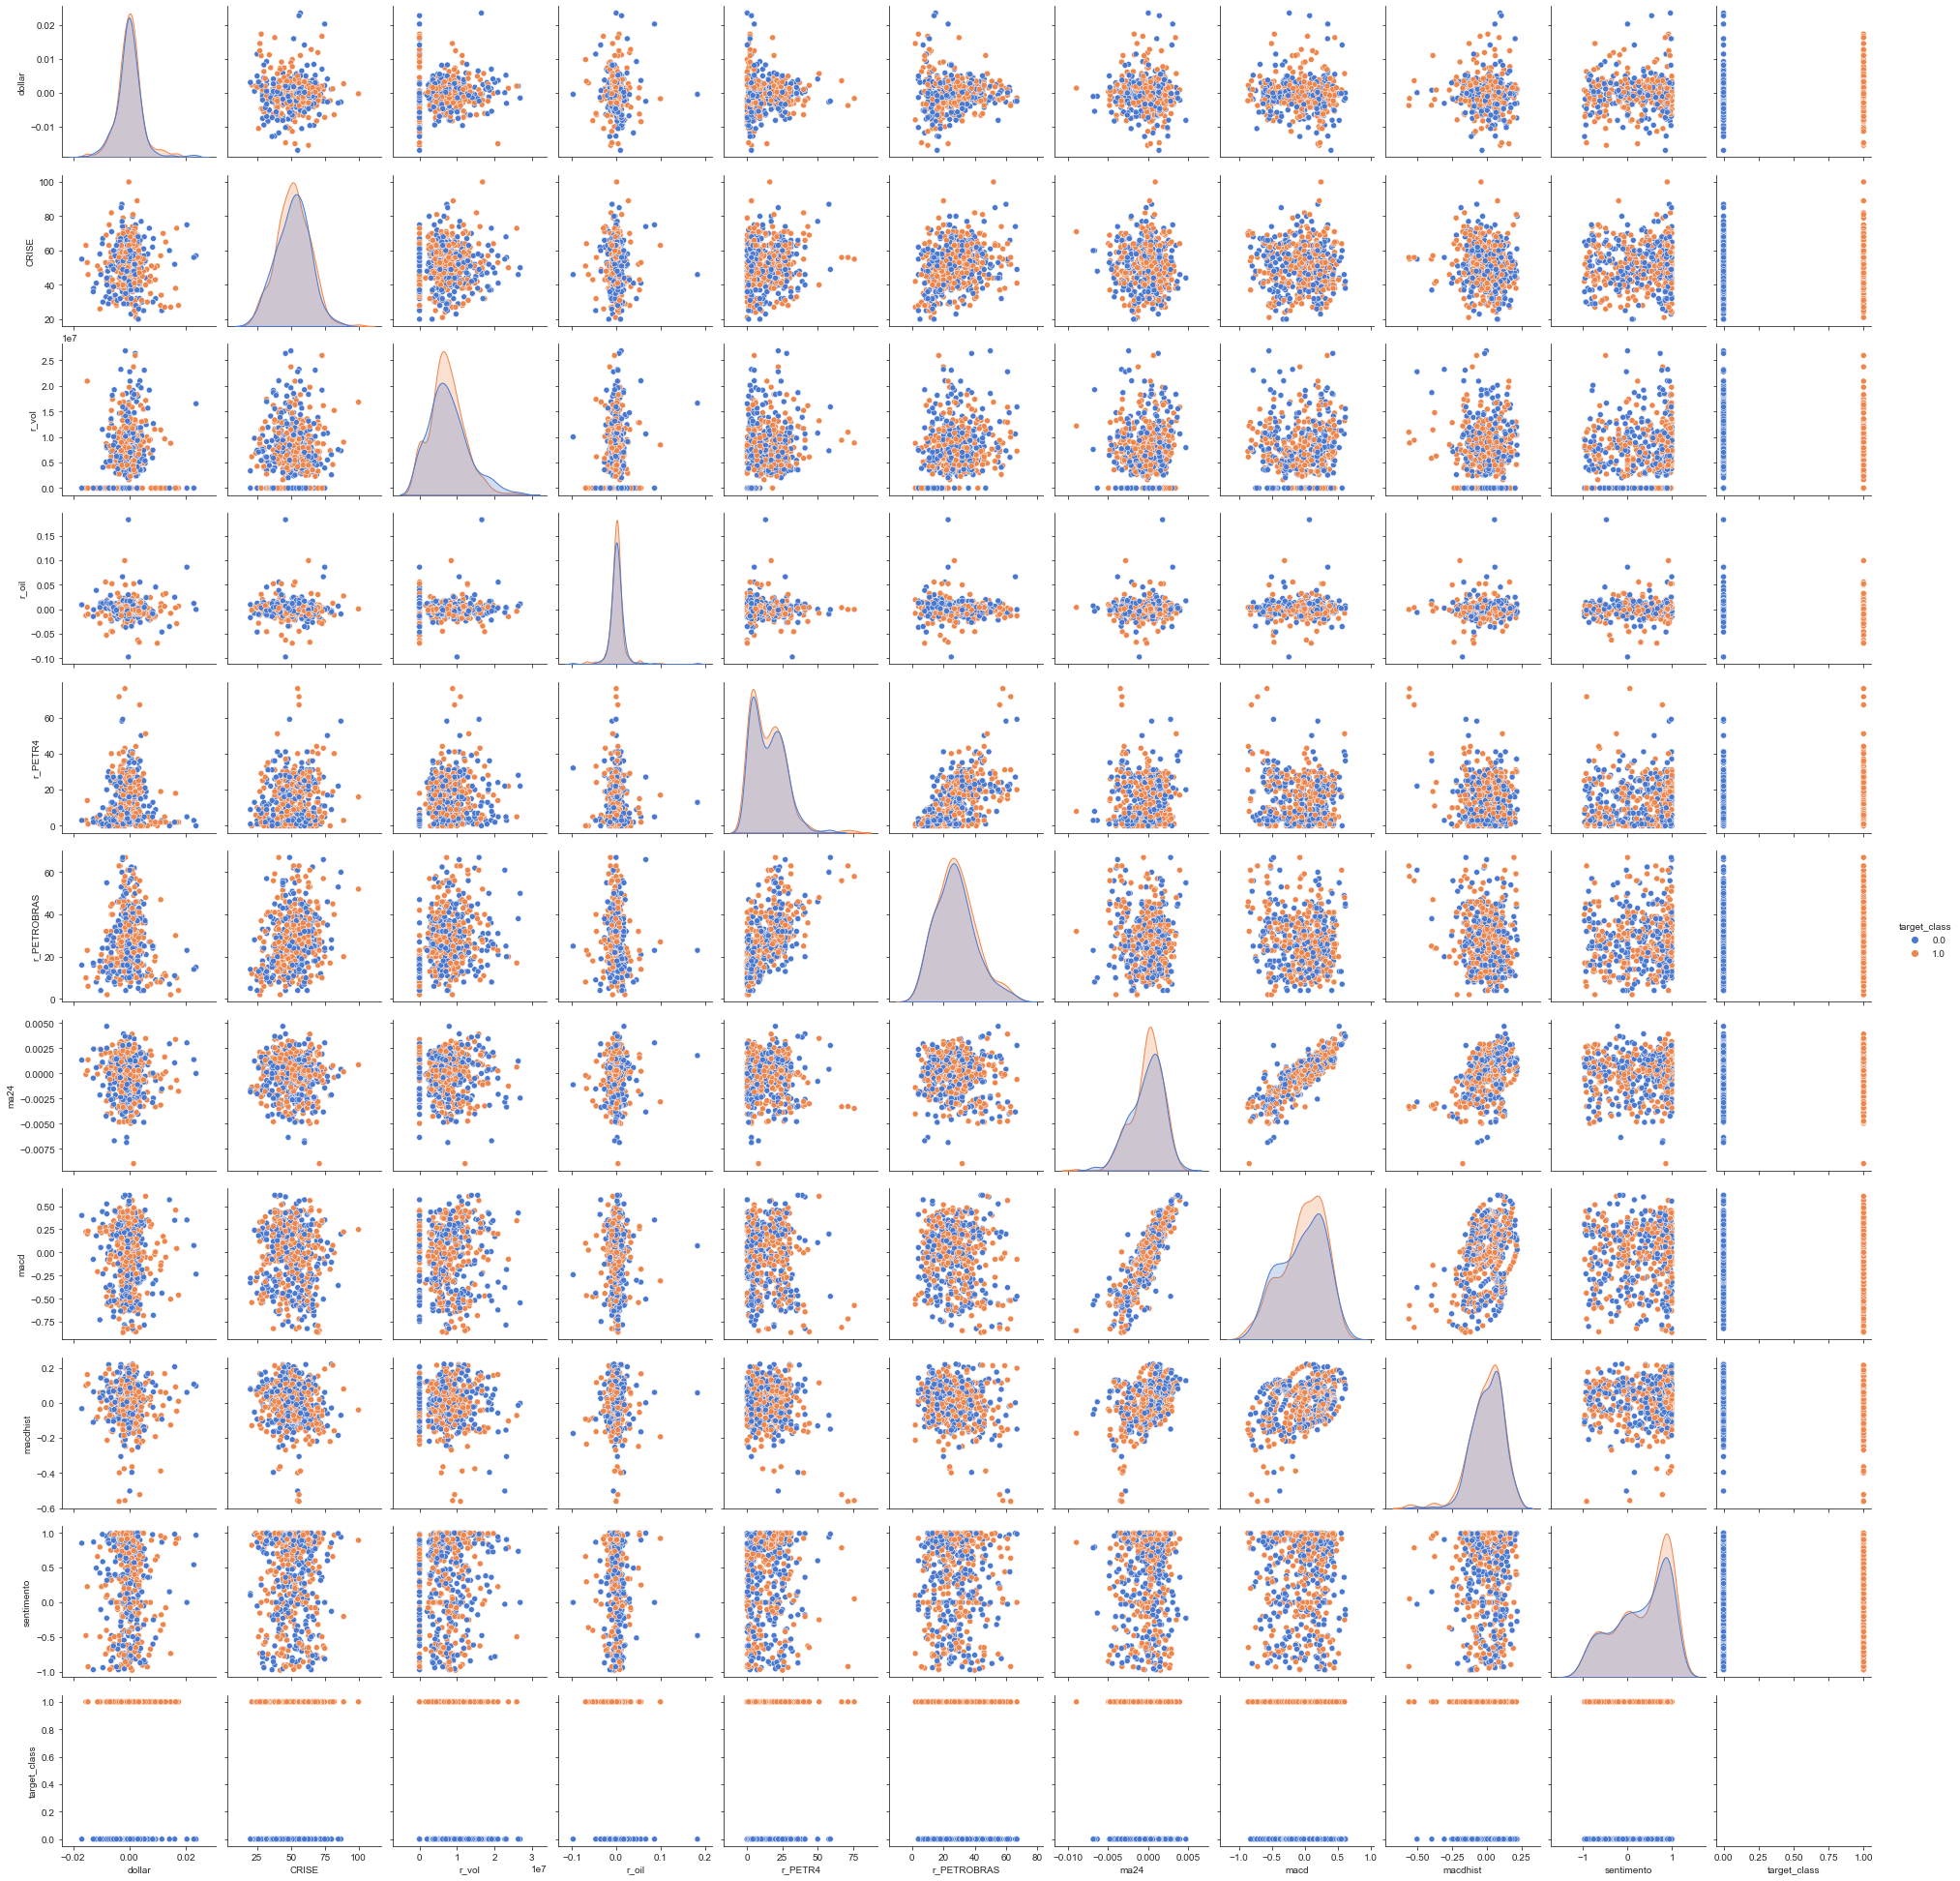

In [34]:
continuas = ['dollar', 'CRISE', 'r_vol', 'r_oil', 'r_PETR4', 'r_PETROBRAS', 'ma24',
       'macd', "macdhist", "sentimento",'target_class']
sns.set_style("ticks")
sns.pairplot(data = data_tweets[continuas], hue = "target_class", vars = data_tweets[continuas].columns, palette="muted")

<AxesSubplot:xlabel='date'>

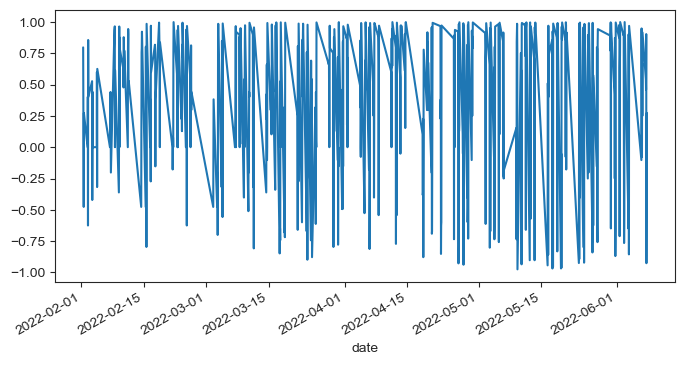

In [36]:
plt.figure(figsize=(8, 4), dpi=100)
data_tweets["sentimento"].plot()

In [40]:
data_tweets["sentimento"].describe()

count    567.000000
mean       0.325190
std        0.609297
min       -0.975000
25%       -0.102700
50%        0.476700
75%        0.891000
max        0.998600
Name: sentimento, dtype: float64

<AxesSubplot:>

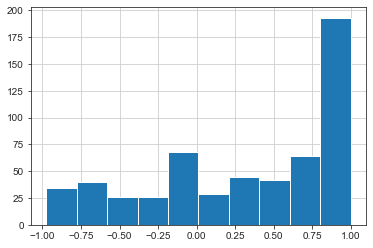

In [42]:
data_tweets["sentimento"].hist()

In [40]:
data_tweets.to_csv("data/trabalho_final_tweets.csv", date_format = '%Y-%m-%d %H:%M:%S')